In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

In [38]:
merged_auc_dataframe = pd.read_table('./s4-merged_auc.dir/merged_auc.txt')
merged_auc_dataframe = merged_auc_dataframe.query('normalization in ["correlation", "zscore", "generif_overlap_zscore", "autorif_overlap_zscore"]').replace('zscore', 'Enrichr Co-occurrence').replace('correlation', 'ARCHS4 Coexpression').replace('generif_overlap_zscore', 'GeneRIF').replace('autorif_overlap_zscore', 'AutoRIF')
merged_auc_dataframe.head()

term_name       auc          normalization  \
1   AKT1_human_kinase_ARCHS4_coexpression  0.688266                AutoRIF   
2   AKT1_human_kinase_ARCHS4_coexpression  0.991607    ARCHS4 Coexpression   
6   AKT1_human_kinase_ARCHS4_coexpression  0.592859                GeneRIF   
9   AKT1_human_kinase_ARCHS4_coexpression  0.975910  Enrichr Co-occurrence   
12  AKT2_human_kinase_ARCHS4_coexpression  0.664843                AutoRIF   

                 library  nr_genes  
1   ARCHS4_Kinases_Coexp       299  
2   ARCHS4_Kinases_Coexp       299  
6   ARCHS4_Kinases_Coexp       299  
9   ARCHS4_Kinases_Coexp       299  
12  ARCHS4_Kinases_Coexp       299

In [39]:
# Cast dataframe
cast_dataframe = merged_auc_dataframe.pivot_table(index=['term_name', 'library'], columns='normalization', values='auc').dropna().reset_index().set_index('term_name')#.merge(merged_auc_dataframe[['term_name', 'library']]).reset
cast_dataframe.head()

normalization                                                          library  \
term_name                                                                        
'de novo' posttranslational protein folding (GO...  GO_Biological_Process_2018   
1-acylglycerol-3-phosphate O-acyltransferase ac...  GO_Molecular_Function_2018   
1-phosphatidylinositol 4-kinase activity (GO:00...  GO_Molecular_Function_2018   
1-phosphatidylinositol binding (GO:0005545)         GO_Molecular_Function_2018   
1-phosphatidylinositol-3-kinase activity (GO:00...  GO_Molecular_Function_2018   

normalization                                       ARCHS4 Coexpression  \
term_name                                                                 
'de novo' posttranslational protein folding (GO...             0.827933   
1-acylglycerol-3-phosphate O-acyltransferase ac...             0.697563   
1-phosphatidylinositol 4-kinase activity (GO:00...             0.906332   
1-phosphatidylinositol binding (GO:0005545)                    0.788291   
1-phosphatidylinositol-3-kinase activity (GO:00...             0.718698   

normalization                                        AutoRIF  \
term_name                                                      
'de novo' posttranslational protein folding (GO...  0.901532   
1-acylglycerol-3-phosphate O-acyltransferase ac...  0.838892   
1-phosphatidylinositol 4-kinase activity (GO:00...  0.999932   
1-phosphatidylinositol binding (GO:0005545)         0.692100   
1-phosphatidylinositol-3-kinase activity (GO:00...  0.965018   

normalization                                       Enrichr Co-occurrence  \
term_name                                                                   
'de novo' posttranslational protein folding (GO...               0.942740   
1-acylglycerol-3-phosphate O-acyltransferase ac...               0.973046   
1-phosphatidylinositol 4-kinase activity (GO:00...               0.936269   
1-phosphatidylinositol binding (GO:0005545)                      0.843917   
1-phosphatidylinositol-3-kinase activity (GO:00...               0.989266   

normalization                                        GeneRIF  
term_name                                                     
'de novo' posttranslational protein folding (GO...  0.691245  
1-acylglycerol-3-phosphate O-acyltransferase ac...  0.584896  
1-phosphatidylinositol 4-kinase activity (GO:00...  0.864380  
1-phosphatidylinositol binding (GO:0005545)         0.707143  
1-phosphatidylinositol-3-kinase activity (GO:00...  0.905143

In [40]:
plot_dataframe = merged_auc_dataframe.copy().rename(columns={'normalization': 'Similarity'})
plot_dataframe.head()

term_name       auc             Similarity  \
1   AKT1_human_kinase_ARCHS4_coexpression  0.688266                AutoRIF   
2   AKT1_human_kinase_ARCHS4_coexpression  0.991607    ARCHS4 Coexpression   
6   AKT1_human_kinase_ARCHS4_coexpression  0.592859                GeneRIF   
9   AKT1_human_kinase_ARCHS4_coexpression  0.975910  Enrichr Co-occurrence   
12  AKT2_human_kinase_ARCHS4_coexpression  0.664843                AutoRIF   

                 library  nr_genes  
1   ARCHS4_Kinases_Coexp       299  
2   ARCHS4_Kinases_Coexp       299  
6   ARCHS4_Kinases_Coexp       299  
9   ARCHS4_Kinases_Coexp       299  
12  ARCHS4_Kinases_Coexp       299

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



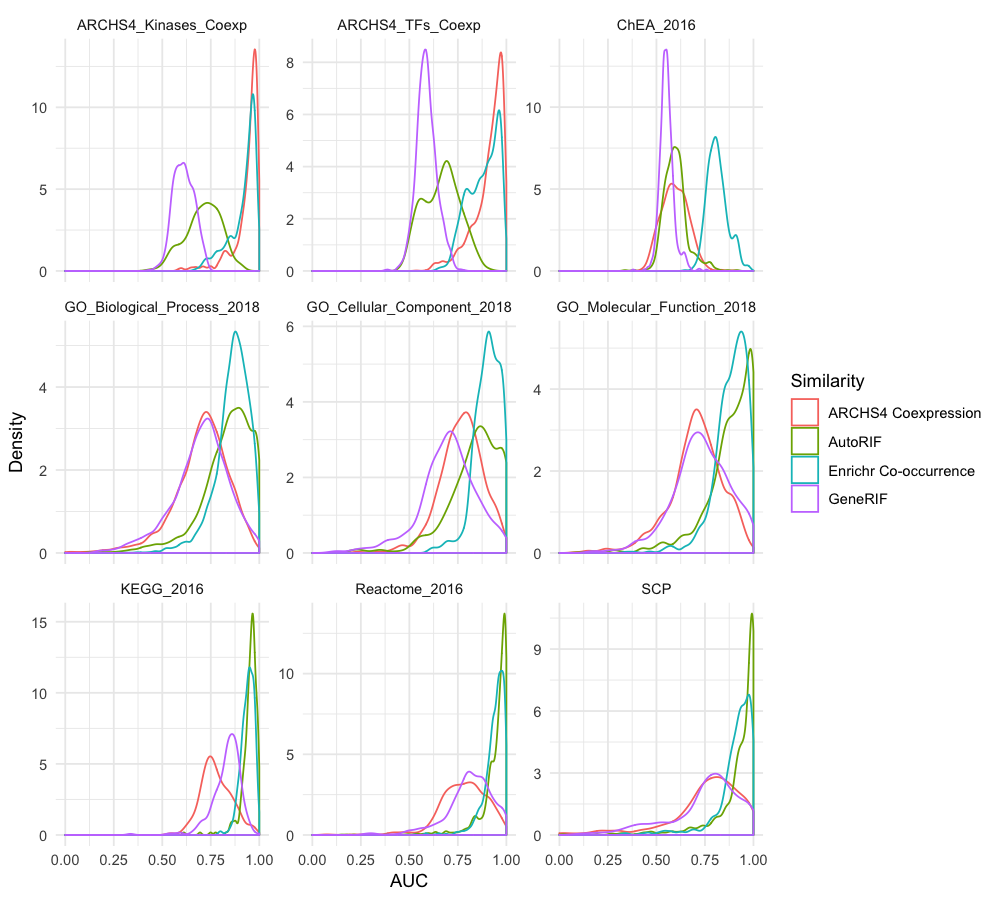

In [41]:
%%R -i plot_dataframe -h 900 -w 1000 -r 120
ggplot(plot_dataframe, aes(x=auc, color=Similarity)) +
    geom_density() + 
    facet_wrap(~library, scales='free_y') +
    theme_minimal() + 
    xlab('AUC') +
    ylab('Density')

/Users/denis/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



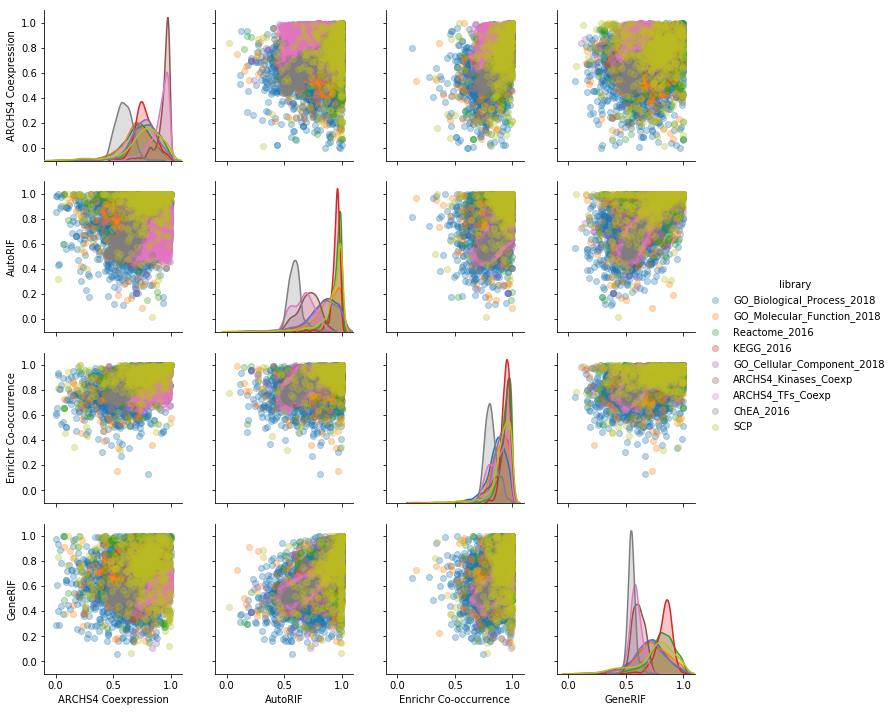

In [50]:
# Single plot
lim = (-0.1, 1.1)
p = sns.pairplot(cast_dataframe, hue='library', kind='reg', plot_kws={'fit_reg': False, 'scatter_kws': {'alpha': 0.3}});
p.set(xlim=lim, ylim=lim);
plt.sup

/Users/denis/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



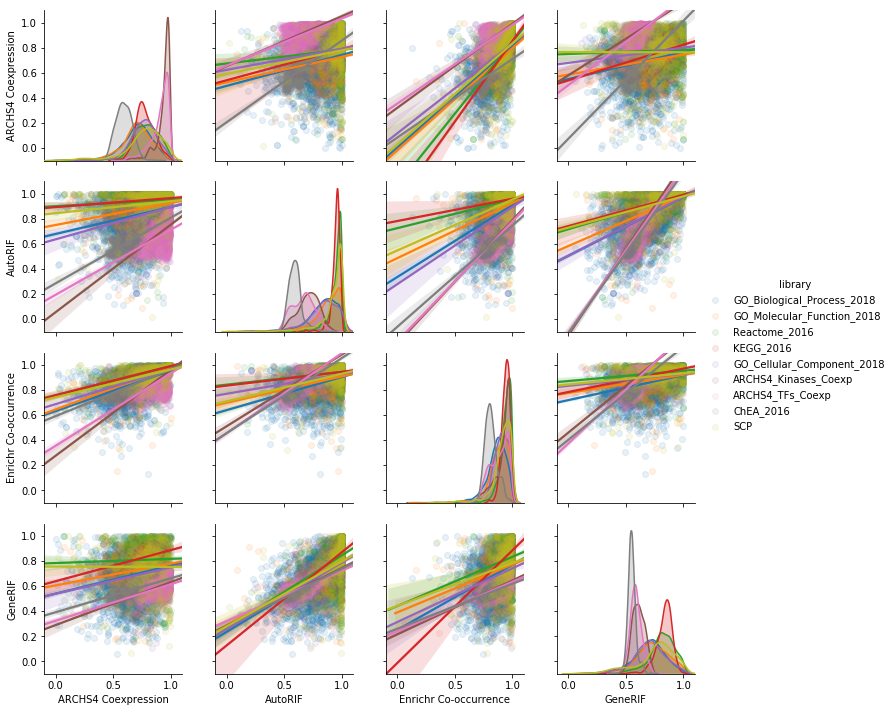

In [48]:
# Single plot
lim = (-0.1, 1.1)
p = sns.pairplot(cast_dataframe, hue='library', kind='reg', plot_kws={'fit_reg': False, 'scatter_kws': {'alpha': 0.6}});
p.set(xlim=lim, ylim=lim);

/Users/denis/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



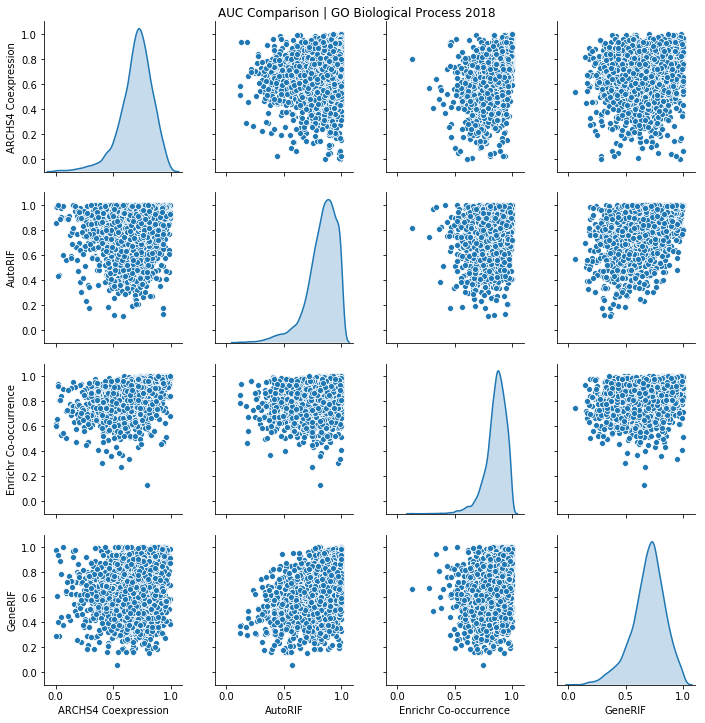

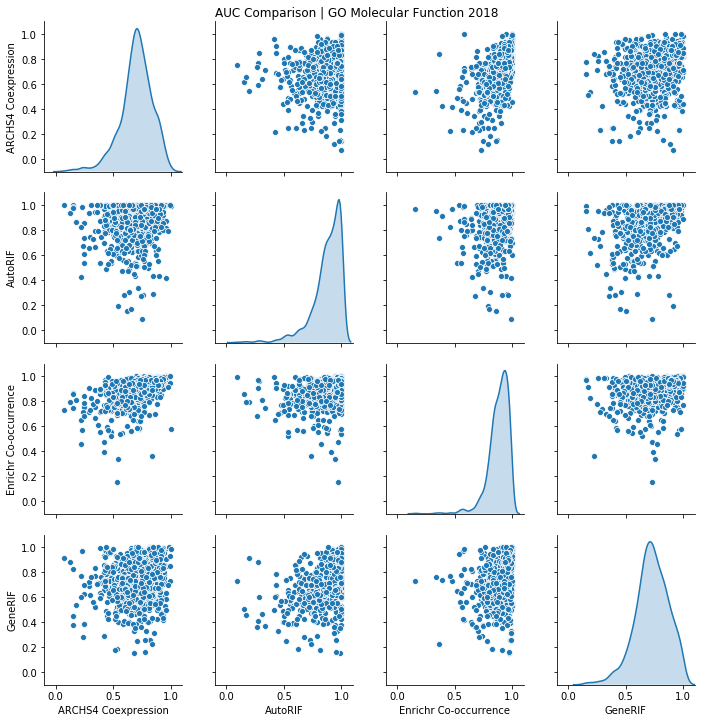

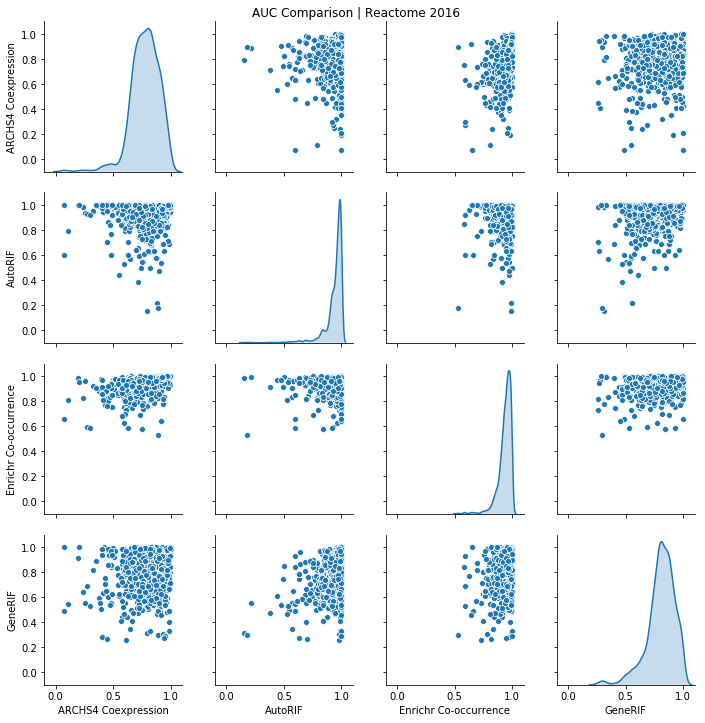

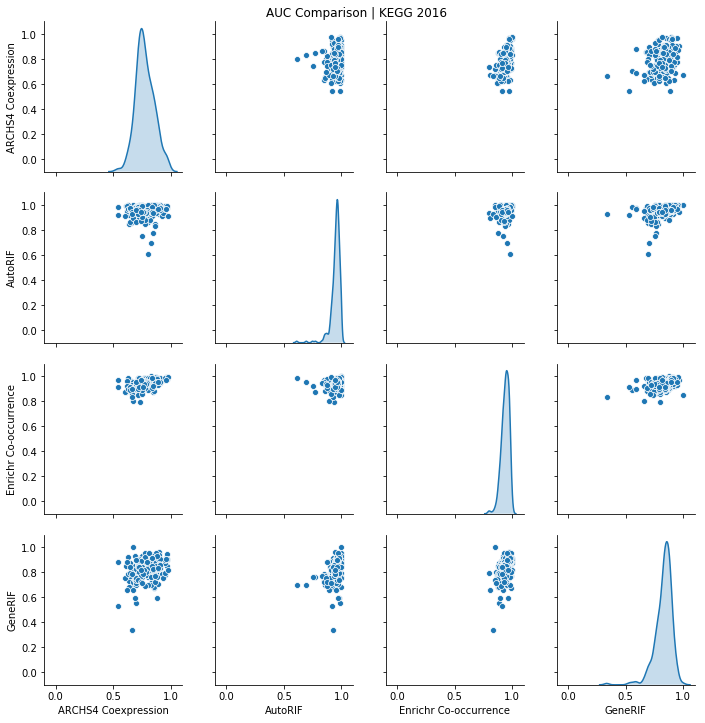

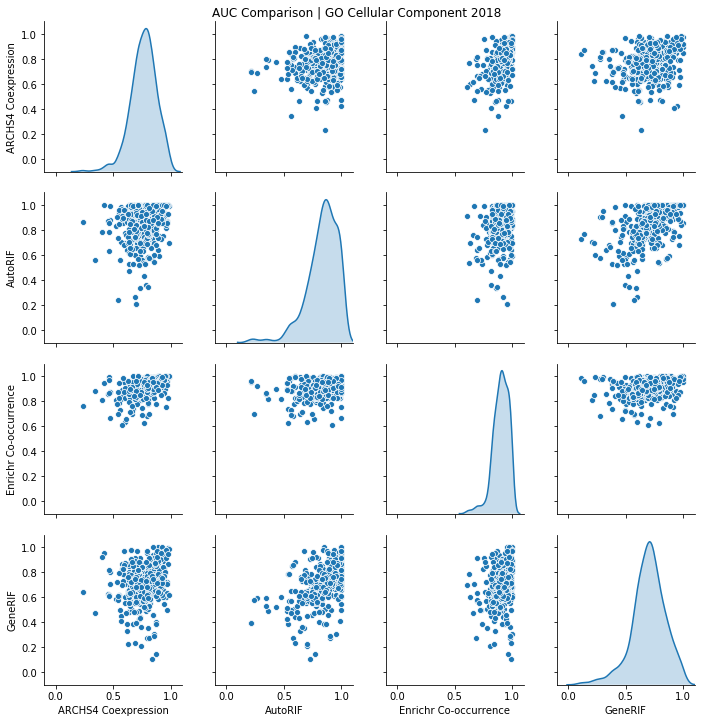

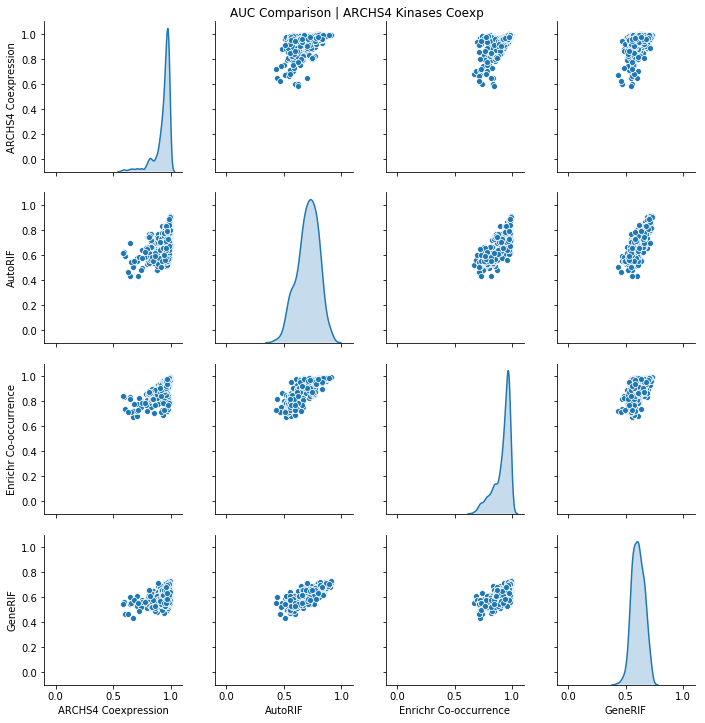

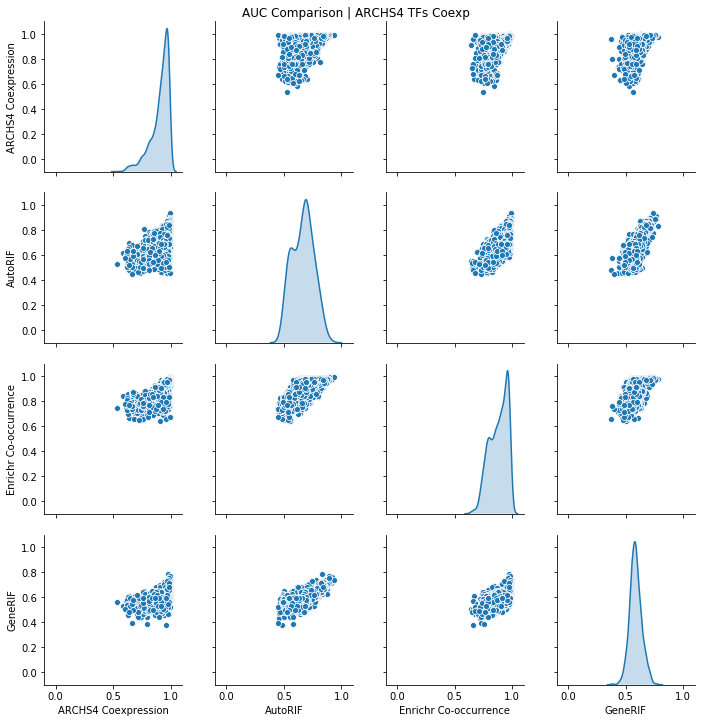

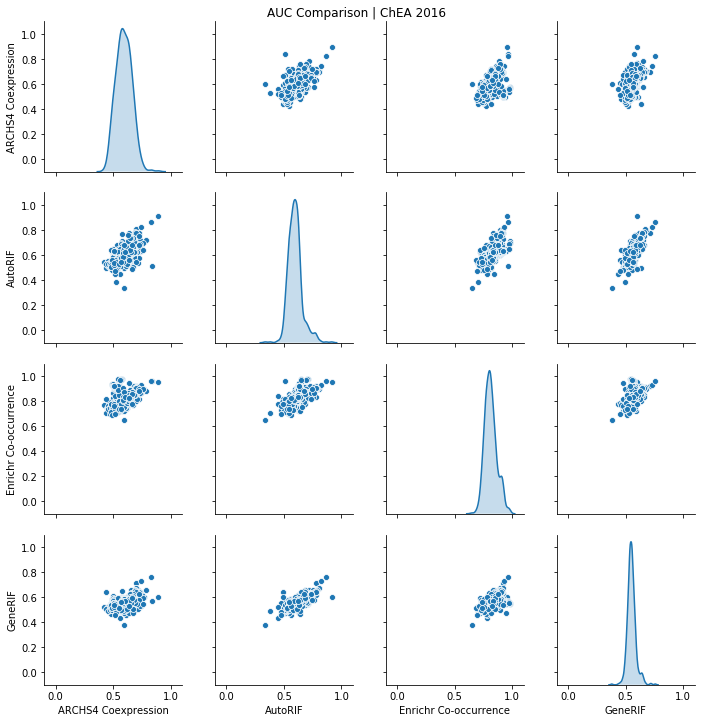

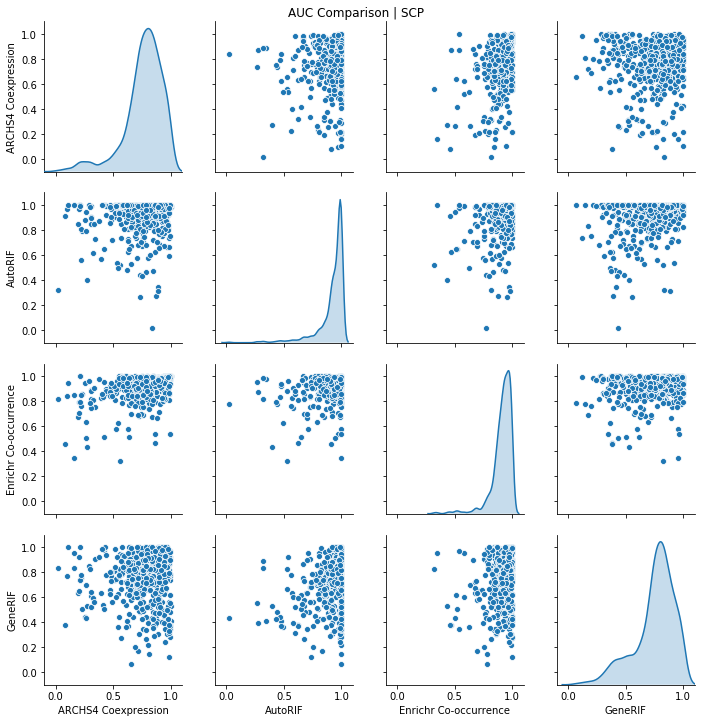

In [54]:
# Loop through libraries
for library in cast_dataframe['library'].unique():
    
    # Plot dataframe
    filtered_dataframe = cast_dataframe[cast_dataframe['library']==library]
    p = sns.pairplot(filtered_dataframe, diag_kind='kde')#, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.6}});
    plt.suptitle('AUC Comparison | '+library.replace('_', ' '), y=1);
    p.set(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1));